
#  SSC Exam Result Analysis


As part of my self-learning journey, I conducted an in-depth analysis of **real SSC (Secondary School Certificate) exam result data**. The goal was to extract meaningful insights that could help educators, institutions, and stakeholders better understand student performance trends.

##  Key Insights from the Analysis:

*  **Pass vs Fail Student Distributions** — Understand the overall success and failure rates.
*  **Most Failed Subjects** — Identify subjects where students are struggling the most.
*  **Subject-wise Fail Correlations** — Discover which subjects are often failed together.
*  **Fine Overview** — Analyze the frequency and patterns of imposed fines.
*  **Cancelled Exam Overview** — Review trends in cancelled or withdrawn subjects.

These insights can support data-driven decision-making for curriculum improvements, early interventions, and targeted academic support.

## Tools & Technologies Used

* `Python`
* `Pandas`
* `Seaborn`
* `Matplotlib`


##  Project Links

*  **GitHub Repository**: [SSC Analysis](https://github.com/ikram-3/ssc-exam-analysis)
*  **Dataset (CSV)**: [Download SSC Result Dataset](https://raw.githubusercontent.com/ikram-3/ssc-exam-analysis/main/SSC.csv)

##  Let's Connect

I'm excited to grow in the field of data science and collaborate on meaningful projects. If you’re working on something similar or would like to discuss this project, feel free to connect!



# 📊 SSC Exam Data Analysis


analyzes student performance in SSC exams. We calculate:
- Total students appeared
- Number of students passed and failed
- Most failed subjects



### Loading the Dataset
>This section imports the required Python libraries (pandas, matplotlib.pyplot, seaborn, and Counter from collections) for data analysis and visualization. It then loads the SSC exam dataset from the file SSC.csv into a pandas DataFrame and displays the first five rows to provide a quick overview of the data structure.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv("SSC.csv")
df.head()


,ROLL_NO,NAME,FATHER_NAME,MARKS,GRADE,REMARKS
0,100001,JALWA BIBI,ALAM ZEB,NaN,NaN,"PS-I,M-I,PH-I,CH-I,"
1,100002,IQRA AYAZ,MUHAMMAD AYAZ,NaN,NaN,"PS-I,PH-I,CH-I,"
2,100003,UROOJ MALIK,GUL MALIK,NaN,NaN,"PH-I,CH-I,"
3,100004,MUSKAN BIBI,RAHMAN ALI,NaN,NaN,"IC-I,PS-I,M-I,PH-I,CH-I,"
4,100005,KASHMALA BEGUM,RIAZ UD DIN,NaN,NaN,"IC-I,PS-I,M-I,CH-I,BIO-1,"


### Calculating Pass and Fail Statistics
> This section creates a new column Status in the DataFrame to classify students as 'Pass' or 'Fail' based on whether their GRADE is non-null (indicating a pass). It then computes the total number of students, the number of students who passed, and the number who failed, printing these statistics for a clear summary.

In [3]:

df['Status'] = df['GRADE'].apply(lambda x: 'Pass' if pd.notna(x) else 'Fail')

total_students = df.shape[0]
status_counts = df['Status'].value_counts()

print("Total Students:", total_students)
print("Passed:", status_counts['Pass'])
print("Failed:", status_counts['Fail'])
df

Total Students: 98782
Passed: 59593
Failed: 39189


,ROLL_NO,NAME,FATHER_NAME,MARKS,GRADE,REMARKS,Status
0,100001,JALWA BIBI,ALAM ZEB,NaN,NaN,"PS-I,M-I,PH-I,CH-I,",Fail
1,100002,IQRA AYAZ,MUHAMMAD AYAZ,NaN,NaN,"PS-I,PH-I,CH-I,",Fail
2,100003,UROOJ MALIK,GUL MALIK,NaN,NaN,"PH-I,CH-I,",Fail
3,100004,MUSKAN BIBI,RAHMAN ALI,NaN,NaN,"IC-I,PS-I,M-I,PH-I,CH-I,",Fail
4,100005,KASHMALA BEGUM,RIAZ UD DIN,NaN,NaN,"IC-I,PS-I,M-I,CH-I,BIO-1,",Fail
...,...,...,...,...,...,...,...
98777,283958,Naeem Ullah,Bakht sher Ali,NaN,NaN,"PH-I,M-II,PH-II,",Fail
98778,283959,SHEHBAZ GHANI,FAZAL GHANI,535,D,NaN,Pass
98779,283960,Humira Bibi,Shafiq Ahmad,NaN,NaN,"PH-I,IC-II,MQ-II,",Fail
98780,283961,USMAN ALI,MUHAMMAD IQBAL,NaN,NaN,"IC-II,PS-II,",Fail


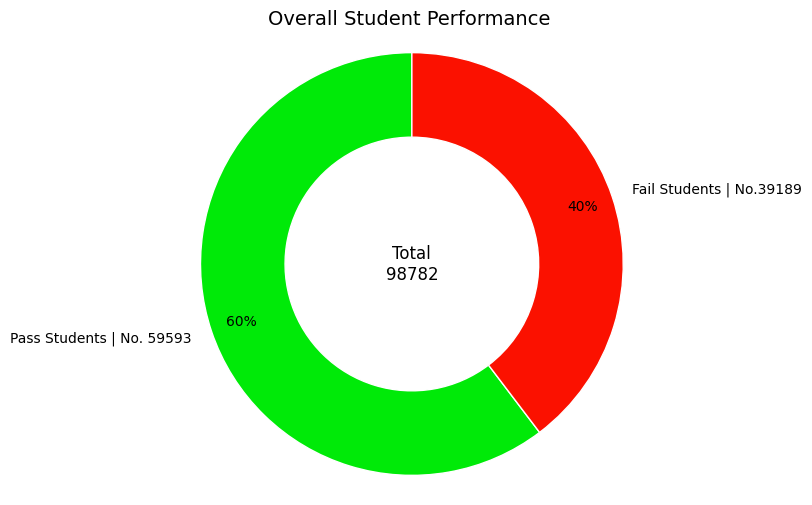

In [4]:
plt.figure(figsize=(6, 6))
plt.pie(
    x=[status_counts["Pass"], status_counts["Fail"]],
    labels=[f"Pass Students | No. {status_counts["Pass"]}", f"Fail Students | No.{status_counts["Fail"]}"],
    autopct="%1.0f%%",
    startangle=90,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    colors=["#00EA08", "#FB1100"] ,
    pctdistance=0.85
)

plt.text(0, 0, f'Total\n{status_counts.sum()}', ha='center', va='center', fontsize=12)

plt.title("Overall Student Performance ", fontsize=14)
plt.axis('equal') 
plt.show()


C:\Users\ikram\AppData\Local\Temp\ipykernel_15336\1633871303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")


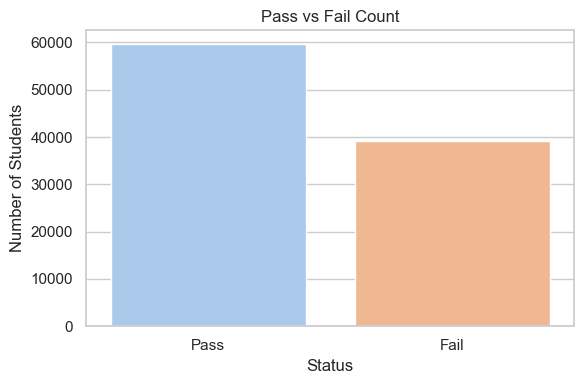

In [5]:

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")
plt.title("Pass vs Fail Count")
plt.ylabel("Number of Students")
plt.xlabel("Status")
plt.tight_layout()
plt.show()


### Analyzing Subject Failure Combinations
> This section uses the itertools.combinations and collections.Counter to identify and count pairs of subjects that students failed together. It processes the failed_subjects data (assumed to be a list of subject lists from the REMARKS column) to generate combinations of failed subjects and stores the counts in a dictionary for further analysis.

In [6]:

failed_subjects = df[df['Status'] == 'Fail']['REMARKS'].dropna().str.split(',')

flat_subjects = [subject.strip() for sublist in failed_subjects for subject in sublist if subject.strip()]
subject_failures = Counter(flat_subjects)

subject_df = pd.DataFrame(subject_failures.items(), columns=['Subject', 'Failures']).sort_values(by='Failures', ascending=False)
subject_df.head(15)


,Subject,Failures
3,CH-I,19107
4,IC-I,12383
2,PH-I,10816
6,E-I,9938
1,M-I,8797
5,BIO-1,8433
0,PS-I,4651
9,GM-I,4351
42,M-II,3147
45,CH-II,2730


C:\Users\ikram\AppData\Local\Temp\ipykernel_15336\3483190184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subject_df.head(10), x='Subject', y='Failures', palette='Reds_r')


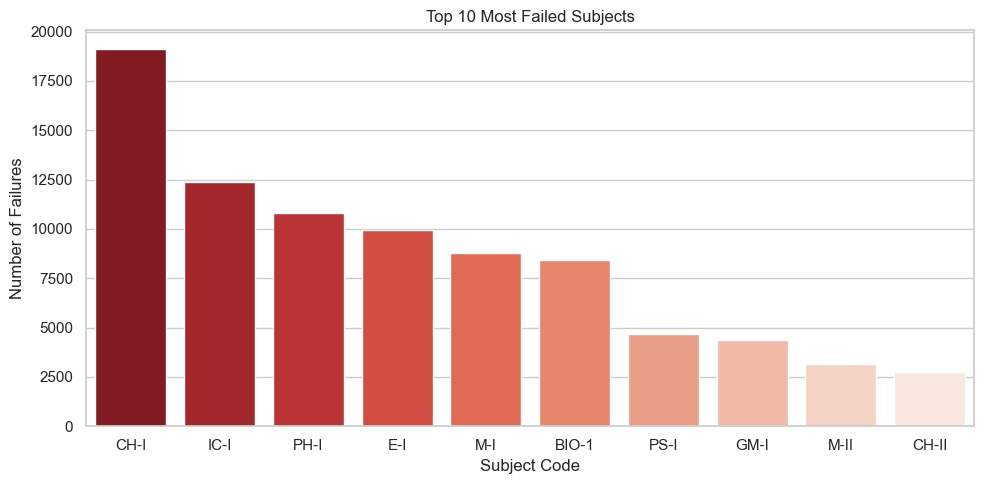

In [7]:

plt.figure(figsize=(10,5))
sns.barplot(data=subject_df.head(10), x='Subject', y='Failures', palette='Reds_r')
plt.title("Top 10 Most Failed Subjects")
plt.xlabel("Subject Code")
plt.ylabel("Number of Failures")
plt.tight_layout()
plt.show()


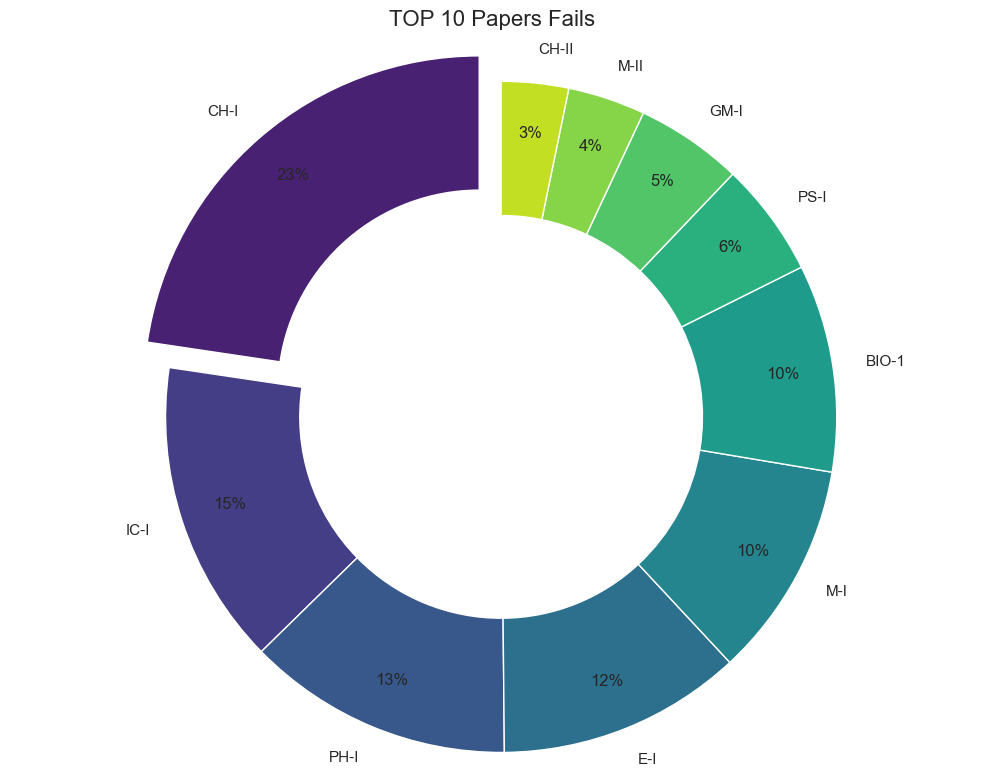

Highest Fails Remark: CH-I with a count of 19107


In [8]:

import numpy as np 
failed_subjects = df[df['Status'] == 'Fail']['REMARKS'].dropna().str.split(',')

all_subjects = [sub.strip() for sublist in failed_subjects for sub in sublist if sub.strip()]

subject_counts = Counter(all_subjects)

fail_subject = pd.DataFrame(subject_counts.items(), columns=['REMARKS', 'count'])
fail_subject = fail_subject.sort_values(by='count', ascending=False).reset_index(drop=True)

top_10_counts = fail_subject['count'].head(10)
top_10_remarks = fail_subject['REMARKS'].head(10)
max_index = np.argmax(top_10_counts)

explode = [0] * len(top_10_counts)
explode[max_index] = 0.1

plt.figure(figsize=(10, 8))
wedge_props = {'width': 0.4, 'edgecolor': 'white'}

plt.pie(
    top_10_counts,
    labels=top_10_remarks,
    autopct="%1.0f%%",
    startangle=90,
    colors=sns.color_palette('viridis', len(top_10_counts)),
    pctdistance=0.85,
    wedgeprops=wedge_props,
    explode=explode
)

plt.title("TOP 10 Papers Fails", fontsize=16)
plt.axis('equal')  
plt.tight_layout()
plt.show()

highest_remark = top_10_remarks.iloc[max_index]
highest_count = top_10_counts.iloc[max_index]
print(f"Highest Fails Remark: {highest_remark} with a count of {highest_count}")


### Top 10 Most Common Student Names
This code shows the most frequently occurring student names in the Result:

In [9]:
top_names = df['NAME'].value_counts().head(10).drop("NAME")
pd.DataFrame(top_names).reset_index()

,NAME,count
0,ABDULLAH,352
1,SALMAN KHAN,263
2,SUDAIS KHAN,224
3,HAMZA KHAN,224
4,UBAID ULLAH,218
5,SANA ULLAH,217
6,AWAIS KHAN,217
7,ABBAS KHAN,216
8,INAM ULLAH,212


## Faild Subject Count 
|ROLL_NO|NAME|FATHER_NAME|MARKS|GRADE|REMARKS|Status|Failed_Subject_Count|
|---|---|---|---|---|---|---|---|
|100001|JALWA BIBI	|ALAM ZEB	|NaN	|NaN	|PS-I,M-I,PH-I,CH-I,|	Fail|	5.0|

In [10]:

df['Failed_Subject_Count'] = df['REMARKS'].dropna().apply(lambda x: len(x.split(',')))
df.drop(["ROLL_NO","FATHER_NAME","GRADE","REMARKS"],axis=1).sample(10)

,NAME,MARKS,Status,Failed_Subject_Count
67690,IQRA NAZ,1079,Pass,NaN
25004,KHAISTA RAHMAN,NaN,Fail,9.0
11014,MUHAMMAD TALHA JAN,380,Pass,NaN
84487,Tasir Abbas,995,Pass,NaN
11831,HAMDAN AHMAD,NaN,Fail,6.0
80303,NAME,MARKS,Pass,1.0
97649,Azeem Khan,NaN,Fail,5.0
18961,MUSKAN,450,Pass,NaN
35750,SHAH HUSSAIN,424,Pass,NaN
52781,KHALOOD SHAH,850,Pass,NaN


In [11]:
df['Class_Level'] = df['REMARKS'].apply(lambda x: '9th' if 'CH-I' in str(x) or 'PH-I' in str(x) else '10th')
class_grouped = df.groupby(['Class_Level', 'Status']).size()
class_grouped.unstack()

Status,Fail,Pass
Class_Level,,
10th,14348.0,59593.0
9th,24841.0,NaN


## Grade Summary

First we out the Grades of

In [12]:
df["GRADE"].unique()

array([nan, 'B', 'C', 'A', 'GRADE', 'A1', 'D', 'E'], dtype=object)

### Students Who Got A1 Grade in SSC
This code calculates the total number of students who received an A1 grade in the SSC exams:

In [13]:
A1 = df[df['GRADE']=="A1"].shape[0]
print("The Studets Got A1 Grade in SSC: ",A1)

The Studets Got A1 Grade in SSC:  13615


### Students Who Got A Grade in SSC
This code calculates the total number of students who received an A grade in the SSC exams:

In [14]:
A = df[df['GRADE']=="A"].shape[0]
print("The Studets Got A Grade in SSC: ",A)

The Studets Got A Grade in SSC:  16653


### Students Who Got B Grade in SSC
This code calculates the total number of students who received a B grade in the SSC exams:

In [15]:
B = df[df['GRADE']=="B"].shape[0]
print("The Studets Got B Grade in SSC: ",B)

The Studets Got B Grade in SSC:  15747


### Students Who Got C Grade in SSC
This code calculates the total number of students who received a C grade in the SSC exams:

In [16]:
C = df[df['GRADE']=="C"].shape[0]
print("The Studets Got C Grade in SSC: ",C)

The Studets Got C Grade in SSC:  10234


### Students Who Got D Grade in SSC
This code calculates the total number of students who received a D grade in the SSC exams:

In [17]:
D = df[df['GRADE']=="D"].shape[0]
print("The Studets Got D Grade in SSC: ",D)


The Studets Got D Grade in SSC:  1580


### Students Who Got E Grade in SSC
This code calculates the total number of students who received an E grade in the SSC exams:

In [18]:
E = df[df['GRADE']=="E"].shape[0]
print("The Studets Got C Grade in SSC: ",E)
df[df['GRADE']=="E"]

The Studets Got C Grade in SSC:  1


,ROLL_NO,NAME,FATHER_NAME,MARKS,GRADE,REMARKS,Status,Failed_Subject_Count,Class_Level
98149,283334,ABDULLAH KHAN,MUHAMMAD ZAMIN KHAN,424,E,MNI,Pass,1.0,10th


In [42]:
fail = df[df['GRADE'].isin([np.nan])].shape[0]
print("The Number of student appear  in the fail SSC: ",fail)

The Number of student appear  in the fail SSC:  39189


### Distribution of Failed Subject Counts
This code creates a DataFrame showing how many students failed a specific number of subjects (e.g., how many students failed 1 subject, 2 subjects, up to the maximum). It sorts the counts in ascending order:

In [20]:
Failed_Subject_Count= pd.DataFrame(df['Failed_Subject_Count'].value_counts(ascending=True)).reset_index()
Failed_Subject_Count

,Failed_Subject_Count,count
0,9.0,378
1,10.0,640
2,8.0,821
3,7.0,1697
4,6.0,2494
5,1.0,2658
6,5.0,3975
7,4.0,5720
8,3.0,8388
9,2.0,14549


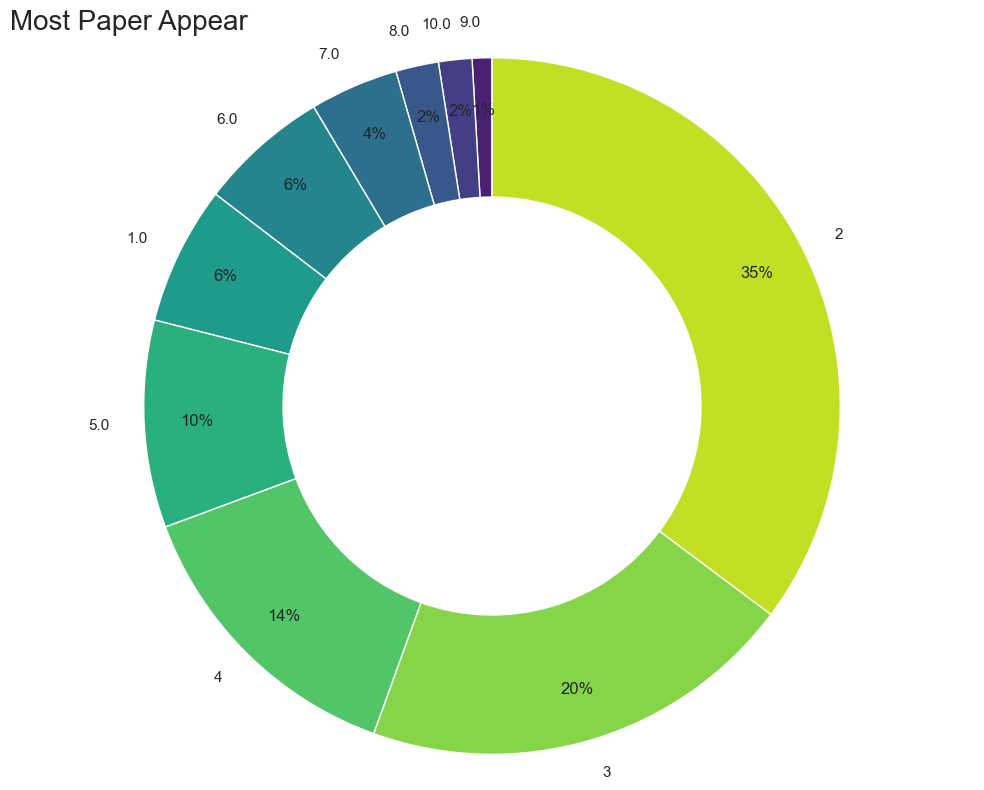

In [ ]:
no_of_subject_Fail = Failed_Subject_Count['count']
no_of_subject_label  = Failed_Subject_Count['Failed_Subject_Count']
max_index = np.argmax(no_of_subject_Fail)

plt.figure(figsize=(10, 8))
wedge_props = {'width': 0.4, 'edgecolor': 'white'}

plt.pie(
    no_of_subject_Fail,
    labels=[9.0, 10.0, 8.0, 7.0, 6.0, 1.0, 5.0, 4, 3, 2],
    autopct="%1.0f%%",
    startangle=90,
    colors=sns.color_palette('viridis', len(no_of_subject_Fail)),
    pctdistance=0.85,
    wedgeprops=wedge_props,
    
)

plt.title("Most Paper Appear", fontsize=20,loc="left")
plt.axis('equal')  
plt.tight_layout()
plt.show()



### 462 Students Failed Ten Subjects in 9th Class
This code filters the students from Class 9 who failed exactly 10 subjects, drops unnecessary columns, and displays the top 10 entries:

In [ ]:
print("9th class 462 student fail ten subject")
top_ten_student_fail_in_9th= df[df['Failed_Subject_Count']==10].drop(["NAME"	,"FATHER_NAME"	,"MARKS"	,"GRADE"],axis=1).head(10)
top_ten_student_fail_in_9th[top_ten_student_fail_in_9th["Class_Level"]== "9th"]

9th class 462 student fail ten subject


,ROLL_NO,REMARKS,Status,Failed_Subject_Count,Class_Level
24,100025,"E-I,IC-I,PS-I,M-I,MQ-I,PH-I,CH-I,BIO-1,U-I,",Fail,10.0,9th
137,100141,"E-I,IC-I,PS-I,M-I,MQ-I,PH-I,CH-I,BIO-1,U-I,",Fail,10.0,9th
169,100172,"E-I,IC-I,PS-I,M-I,MQ-I,PH-I,CH-I,BIO-1,U-I,",Fail,10.0,9th
207,100217,"E-I,IC-I,PS-I,M-I,MQ-I,PH-I,CH-I,BIO-1,U-I,",Fail,10.0,9th
413,100432,"E-I,IC-I,PS-I,M-I,MQ-I,PH-I,CH-I,BIO-1,U-I,",Fail,10.0,9th
545,100566,"E-I,IC-I,PS-I,M-I,MQ-I,PH-I,CH-I,BIO-1,U-I,",Fail,10.0,9th
1075,101106,"E-I,IC-I,PS-I,M-I,MQ-I,PH-I,CH-I,BIO-1,U-I,",Fail,10.0,9th
1094,101125,"E-I,IC-I,PS-I,M-I,MQ-I,PH-I,CH-I,BIO-1,U-I,",Fail,10.0,9th


### Two Students Who Failed Ten Subjects in Class 10
This code filters the students who failed exactly 10 subjects and were in Class 10, then displays their details (excluding name, father name, marks, and grade):

In [40]:
print("Two students failed ten subjects in class 10:")

top_student_fail_in_10th = df[df['Failed_Subject_Count'] == 10] \
    .drop(["NAME", "FATHER_NAME", "MARKS", "GRADE"], axis=1) \
    .head(10)

top_student_fail_in_10th[top_student_fail_in_10th["Class_Level"] == "10th"]


Two students failed ten subjects in class 10:


,ROLL_NO,REMARKS,Status,Failed_Subject_Count,Class_Level
802,100828,"E-I,IC-I,PS-I,GS-I,MQ-I,IS-I,PA-I,U-I,GM-I,",Fail,10.0,10th
832,100858,"E-I,IC-I,PS-I,GS-I,MQ-I,IS-I,PA-I,U-I,GM-I,",Fail,10.0,10th


### Chart for Grade 

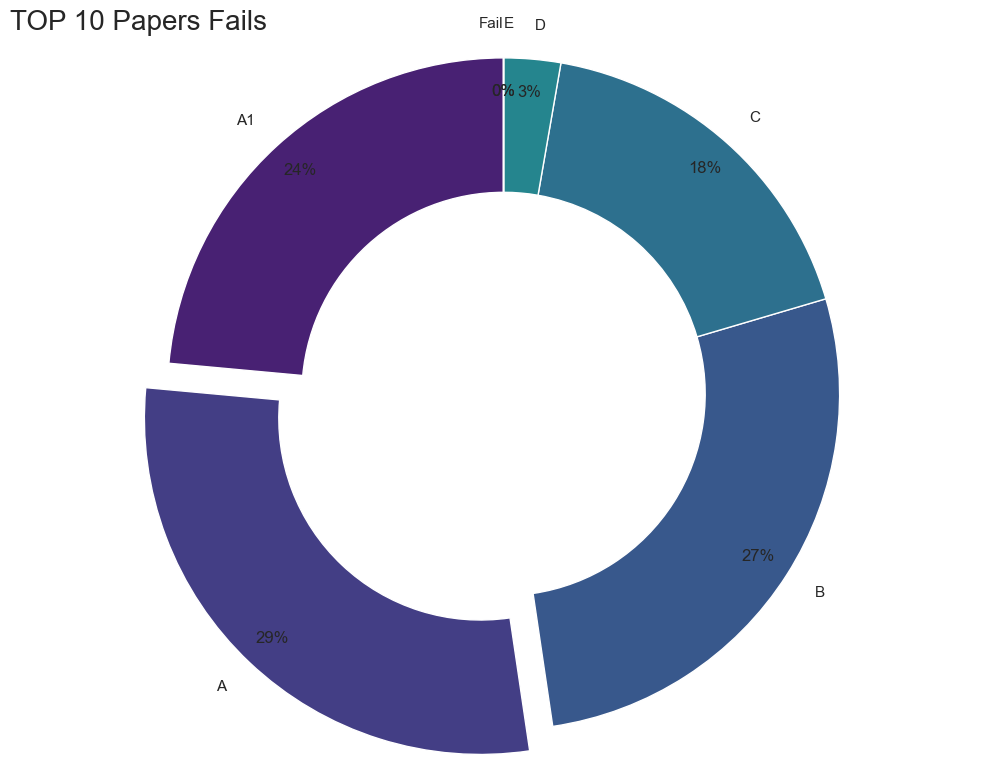

In [33]:

total_Grade = [A1,A,B,C,D,E,fail]
grade_label = ["A1","A","B","C","D","E","Fail"]




max_index = np.argmax(total_Grade)

explode = [0] * len(total_Grade)
explode[max_index] = 0.1

plt.figure(figsize=(10, 8))
wedge_props = {'width': 0.4, 'edgecolor': 'white'}

plt.pie(
    total_Grade,
    labels=grade_label,
    autopct="%1.0f%%",
    startangle=90,
    colors=sns.color_palette('viridis', len(top_10_counts)),
    pctdistance=0.9,
    wedgeprops=wedge_props,
    explode=explode
)

plt.title("TOP 10 Papers Fails", fontsize=20,loc="left")
plt.axis('equal')  
plt.tight_layout()
plt.show()



### Fine Student
> This section modifies the REMARKS column in the fine DataFrame to extract the last element from the comma-separated values in each row. This step focuses on identifying students who were fined, as the last element in the REMARKS column likely contains fine-related information. The processed data will help analyze the fines imposed on students for specific reasons.

In [26]:
fine = df[df['REMARKS'].str.contains("RS",na=True,case=True,)]
fine['REMARKS'].fillna(0,inplace=True)
fine = fine[fine['REMARKS'] !=0]


C:\Users\ikram\AppData\Local\Temp\ipykernel_15336\93648856.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fine['REMARKS'].fillna(0,inplace=True)
C:\Users\ikram\AppData\Local\Temp\ipykernel_15336\93648856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine['REMARKS'].fillna(0,inplace=True)


In [27]:
fine['REMARKS'] = fine['REMARKS'].str.split(",").str.get(-1)

In [28]:
fine.drop(["FATHER_NAME","MARKS",	"GRADE",	"Status",	"Failed_Subject_Count",],axis=1)

,ROLL_NO,NAME,REMARKS,Class_Level
50182,182716,HAZRAT USMAN,Fee Receipt RS: 2200/-,10th
56416,206853,Laiba Syed,DUES RS:2500 LATE IMP/-,10th
98596,283776,UZMA ALI,ORG RS:4700/-,10th
98654,283833,JAWERIA AHMAD,Exam FEE RS:5100/-,9th
98772,283953,MUSKAN,LET OFF FINED RS.1500/-,10th


### Cancel Exam And Paper
>This section filters the DataFrame to find students whose exam records were canceled, as indicated by the term "Cancel" in the REMARKS column. It handles missing values in REMARKS by replacing them with 0 and then excludes any rows where REMARKS is 0, ensuring only relevant cancellation records are retained for further analysis.

In [29]:
Cancel = df[df['REMARKS'].str.contains("Cancel",na=True,case=True,)]
Cancel['REMARKS'].fillna(0,inplace=True)
Cancel = Cancel[Cancel['REMARKS'] !=0]


C:\Users\ikram\AppData\Local\Temp\ipykernel_15336\2923601501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cancel['REMARKS'].fillna(0,inplace=True)
C:\Users\ikram\AppData\Local\Temp\ipykernel_15336\2923601501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cancel['REMARKS'].fillna(0,inplace=True)


In [39]:
Cancel.drop(["Failed_Subject_Count","FATHER_NAME","MARKS","GRADE","Status"],axis=1)

,ROLL_NO,NAME,REMARKS,Class_Level
8632,125750,TAWHEED BIBI,Four Exam: Cancelled,10th
18502,136237,FARYAL ISMAIL,One Exam: Cancelled,10th
34699,152727,ASAD KHAN,One Exam: Cancelled,10th
43184,161491,ASAD ULLAH KHAN,Four Exam: Cancelled,10th
49149,181694,SYED TAWAKKAL KHAN,Six Exam: Cancelled,10th
57734,220395,haseena bibi,Four Exam: Cancelled,10th
84608,249159,SALAR KHAN,Six Exam: Cancelled,10th
86662,251283,Ibad Ullah,Six Exam: Cancelled,10th
91206,256295,ANSAR FAROOQ,Paper Cancelled with fine 1500,10th
92507,257699,IRFAN ALI,One Exam: Cancelled,10th
